In [233]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
import mapclassify as mc
import contextily

## 1. Create base map and define urban area of Glasgow

In [234]:
# read urban and rural data
urban_datazone=pd.read_csv('Data/SmallUser.csv')

/var/folders/74/ch5llxvd3klg6n6_l6_s335w0000gn/T/ipykernel_83759/4241215005.py:2: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  urban_datazone=pd.read_csv('Data/SmallUser.csv')


In [235]:
urban_datazone.columns

Index(['Postcode', 'PostcodeDistrict', 'PostcodeSector', 'DateOfIntroduction',
       'DateOfDeletion', 'GridReferenceEasting', 'GridReferenceNorthing',
       'Latitude', 'Longitude', 'SplitIndicator', 'CouncilArea2019Code',
       'UKParliamentaryConstituency2005Code',
       'ScottishParliamentaryRegion2021Code',
       'ScottishParliamentaryConstituency2021Code', 'ElectoralWard2022Code',
       'HealthBoardArea2019Code', 'HealthBoardArea2006Code',
       'HealthBoardArea1995Code', 'IntegrationAuthority2019Code',
       'OutputArea2011Code', 'OutputArea2001Code', 'OutputArea1991Code',
       'DataZone2011Code', 'DataZone2001Code', 'IntermediateZone2011Code',
       'IntermediateZone2001Code', 'CensusHouseholdCount2011',
       'CensusPopulationCount2011', 'CensusHouseholdCount2001',
       'CensusPopulationCount2001', 'CensusHouseholdCount1991',
       'CensusPopulationCount1991',
       'ScottishIndexOfMultipleDeprivation2020Rank', 'LAU2019Level1Code',
       'ITL2021Level2Code', '

In [236]:
# keep useful columns
urban_datazone=urban_datazone[['DataZone2011Code','UrbanRural6Fold2020Code']]

# delete duplicated rows
urban_datazone=urban_datazone.drop_duplicates()

In [237]:
urban_datazone

,DataZone2011Code,UrbanRural6Fold2020Code
0,S01006853,5
7,S01006514,1
12,S01006513,1
16,S01006516,1
25,S01006515,5
...,...,...
193160,S01012409,6
193164,S01012408,6
193212,S01012406,6
193228,S01012411,6


In [238]:
# read files
scot_simd=gpd.read_file('Data/SG_SIMD_2020/SG_SIMD_2020.shp')
gla_boundary=gpd.read_file('Data/GlasgowBdry_2011/GlasgowBdry_2011.shp')


In [239]:
# reproject it to spherical mercato
scot_simd.to_crs(epsg=3857, inplace=True)
gla_boundary.to_crs(epsg=3857, inplace=True)

In [240]:
# select data zones in Glasgow
gla_simd=scot_simd.loc[scot_simd['LAName']=='Glasgow City']

### 1.1 Define urban and rural area

In [241]:
# merge SIMD with urban codes data
gla_simd= gla_simd.merge(urban_datazone, left_on='DataZone',right_on='DataZone2011Code', how='left')

In [242]:
gla_simd['UrbanRural6Fold2020Code'].unique()

array([1, 5])

In [243]:
# the rows increased, which means some data zones are partially in rural area
gla_simd[gla_simd.duplicated('DataZone2011Code')]

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,DataZone2011Code,UrbanRural6Fold2020Code
10,S01009767,Darnley North - 04,Glasgow City,1099,738,1962,2,3,6,29,...,89,3,17%,1%,1486.0,17004.466933,3.069404e+06,"POLYGON ((-485786.679 7519565.774, -485639.740...",S01009767,1
37,S01009793,Pollok South and West - 02,Glasgow City,1342,867,5229,4,8,15,75,...,97,10,11%,1%,3017.0,5307.901854,1.095028e+06,"POLYGON ((-486355.951 7525018.460, -486366.424...",S01009793,5
217,S01009972,Carmunnock South - 04,Glasgow City,880,512,2098,2,4,7,31,...,101,9,12%,1%,2609.0,20628.646934,4.898133e+06,"POLYGON ((-474123.839 7520598.165, -474111.491...",S01009972,5
225,S01009979,Glenwood South - 07,Glasgow City,518,299,138,1,1,1,2,...,103,4,21%,1%,901.0,3680.176673,3.160827e+05,"POLYGON ((-469794.672 7519279.974, -469791.148...",S01009979,5
335,S01010088,Baillieston East - 01,Glasgow City,1916,1339,5520,4,8,16,80,...,43,8,5%,1%,5292.0,12134.663939,2.504590e+06,"POLYGON ((-454857.341 7529024.492, -454649.963...",S01010088,1
339,S01010091,Baillieston East - 04,Glasgow City,963,699,3917,3,6,12,57,...,101,5,12%,1%,2979.0,10404.213993,2.881871e+06,"POLYGON ((-458391.600 7527095.488, -458423.540...",S01010091,1
358,S01010109,Easterhouse East - 05,Glasgow City,907,649,980,1,2,3,15,...,174,41,24%,6%,380.0,13896.703702,3.668592e+06,"POLYGON ((-454260.509 7535010.353, -454203.179...",S01010109,5
367,S01010117,"Garthamlock, Auchinlea and Gartloch - 05",Glasgow City,1401,990,5019,4,8,15,72,...,80,17,12%,3%,2201.0,22049.305723,5.161941e+06,"POLYGON ((-458093.545 7535826.534, -458024.538...",S01010117,1
373,S01010122,North Barlanark and Easterhouse South - 05,Glasgow City,511,373,5,1,1,1,1,...,105,14,25%,3%,447.5,4359.120819,3.657107e+05,"POLYGON ((-458589.317 7532305.128, -458631.559...",S01010122,5
430,S01010178,Riddrie and Hogganfield - 07,Glasgow City,1067,668,242,1,1,1,4,...,196,21,19%,2%,1051.0,6127.463478,1.075728e+06,"POLYGON ((-464054.633 7534770.712, -463986.843...",S01010178,5


In [244]:
# to ensure that the research is conducted based on urban area, I excluded those data zones have partially been defined as rural
# abtain the code of data zones whose urban areal code are 5

rural_datazone=gla_simd['DataZone'][gla_simd['UrbanRural6Fold2020Code'] == 5].tolist()


In [245]:
gla_simd = gla_simd[~gla_simd['DataZone'].isin(rural_datazone)]

In [246]:
# the number of data zone reduce from 746 to 732
gla_simd.shape

(732, 54)

Text(0.95, 0.84, 'N')

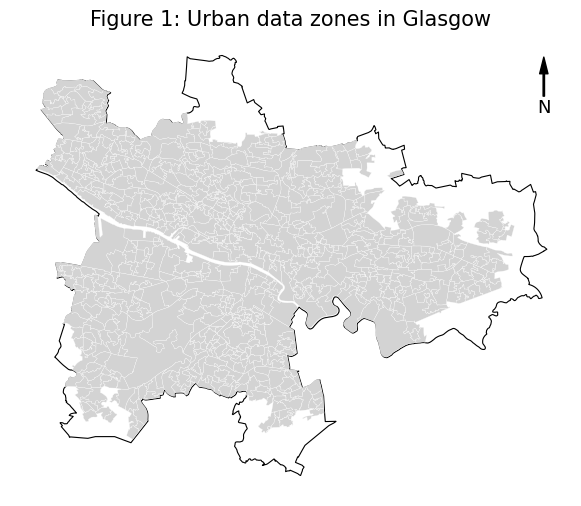

In [247]:
# plot the study area on the map
fig,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
gla_simd.plot(ax=ax,color='lightgrey', edgecolor='white',linewidth=0.2)
ax.set_title('Figure 1: Urban data zones in Glasgow', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

### 1.2 Join population data into SIMD dataset

In [248]:
# read population data
population = gpd.read_file('Data/2011-population-cesus/ons-pop-density_4830035/ons-pop-density_4830035.gdb', layer='Output_Area')
population.to_crs(epsg=3857, inplace=True)

In [250]:
population

,area_code,area_name,census_geography,all_residents,area_ha,density,geometry
0,S00125300,None,oa,85,0.05,1700.0,"MULTIPOLYGON (((-447569.924 7531027.942, -4475..."
1,S00125328,None,oa,55,0.03,1833.3,"MULTIPOLYGON (((-441381.610 7512877.709, -4414..."
2,S00125817,None,oa,60,1.21,49.6,"MULTIPOLYGON (((-440798.910 7521580.395, -4406..."
3,S00123222,None,oa,128,1667.44,0.1,"MULTIPOLYGON (((-451094.033 7541435.560, -4507..."
4,S00130939,None,oa,97,1.45,66.9,"MULTIPOLYGON (((-452404.221 7493719.289, -4525..."
...,...,...,...,...,...,...,...
14125,S00128577,None,oa,90,5.07,17.8,"MULTIPOLYGON (((-494924.346 7528447.032, -4949..."
14126,S00128454,None,oa,119,331.22,0.4,"MULTIPOLYGON (((-490837.027 7534671.335, -4908..."
14127,S00130351,None,oa,127,2.35,54.0,"MULTIPOLYGON (((-469801.704 7524273.239, -4696..."
14128,S00132497,None,oa,62,103.55,0.6,"MULTIPOLYGON (((-472503.154 7512515.210, -4724..."


In [251]:
population.columns

Index(['area_code', 'area_name', 'census_geography', 'all_residents',
       'area_ha', 'density', 'geometry'],
      dtype='object')

Text(0.95, 0.84, 'N')

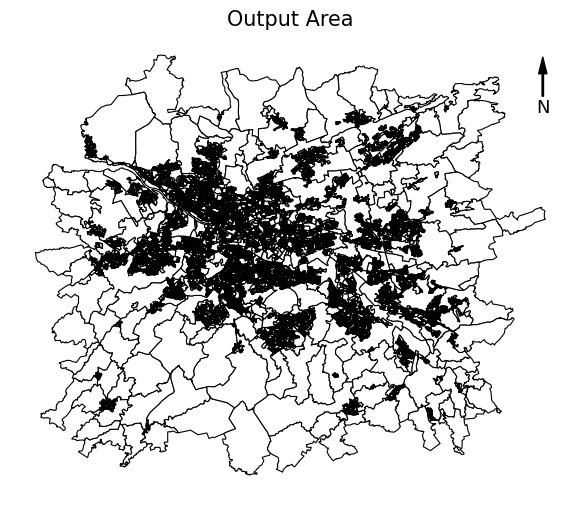

In [252]:
fig,ax=plt.subplots(figsize=(12,6))
population.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)

ax.set_title('Output Area', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

In [327]:
# Join the population data with SIMD dataset within Glasgow boundary
gla_simd_oa=gpd.sjoin(population[['all_residents','area_ha', 'density','geometry']],gla_simd,lsuffix='OA', rsuffix='DZ' ,op='within')

/Users/hucongying/mambaforge/envs/geo/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [328]:
gla_simd_oa

,all_residents,area_ha,density,geometry,index_DZ,DataZone,DZName,LAName,SAPE2017,WAPE2017,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code
5,56,0.04,1400.0,"MULTIPOLYGON (((-478041.925 7535912.795, -4780...",617,S01010362,Wyndford - 05,Glasgow City,831,645,...,71.0,250,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1
372,83,0.60,138.3,"MULTIPOLYGON (((-477812.746 7536057.997, -4777...",617,S01010362,Wyndford - 05,Glasgow City,831,645,...,71.0,250,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1
1093,100,0.28,357.1,"MULTIPOLYGON (((-477855.521 7536163.617, -4778...",617,S01010362,Wyndford - 05,Glasgow City,831,645,...,71.0,250,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1
3947,116,3.76,30.9,"MULTIPOLYGON (((-477762.928 7535897.314, -4777...",617,S01010362,Wyndford - 05,Glasgow City,831,645,...,71.0,250,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1
5389,53,1.27,41.7,"MULTIPOLYGON (((-478083.574 7536011.531, -4782...",617,S01010362,Wyndford - 05,Glasgow City,831,645,...,71.0,250,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,50,0.25,200.0,"MULTIPOLYGON (((-480377.268 7532188.849, -4803...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,4584.0,145,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1
7813,99,0.32,309.4,"MULTIPOLYGON (((-480250.516 7532096.865, -4801...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,4584.0,145,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1
7814,66,0.21,314.3,"MULTIPOLYGON (((-480218.229 7532153.615, -4802...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,4584.0,145,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1
7898,78,0.17,458.8,"MULTIPOLYGON (((-480326.619 7532165.041, -4803...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,4584.0,145,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1


Text(0.95, 0.84, 'N')

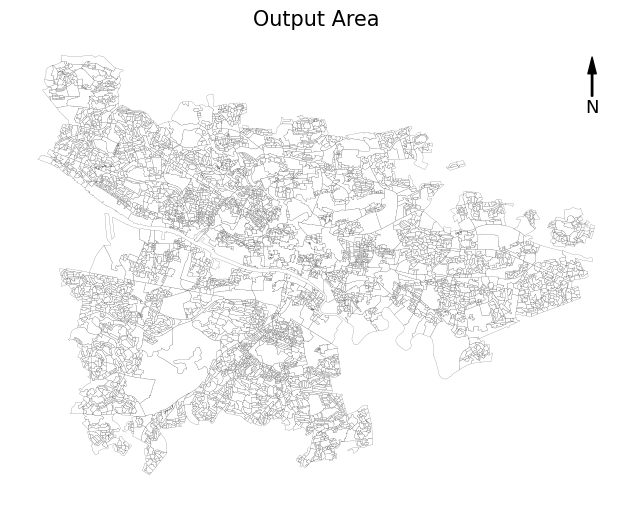

In [331]:
# combined population census data with SIMD data
fig,ax=plt.subplots(figsize=(12,6))
gla_simd_oa.plot(ax=ax,color='white', edgecolor='black',linewidth=0.1)

ax.set_title('Output Area', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

### 1.3 Load residential buildings on map

In [332]:
buildings=gpd.read_file('Data/Verisk/ukbuildings_4686966/ukbuildings_4686966.gdb')
buildings.to_crs(epsg=3857, inplace=True)

In [333]:
# filter residential buildings
residential_use=['RESIDENTIAL ONLY','COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMODATION','RESIDENTIAL WITH RETAIL ON GROUND FLOOR']
residential_buildings=buildings[buildings['use'].isin(residential_use)]

In [334]:
residential_buildings = residential_buildings[['use','geometry']]

Text(0.95, 0.84, 'N')

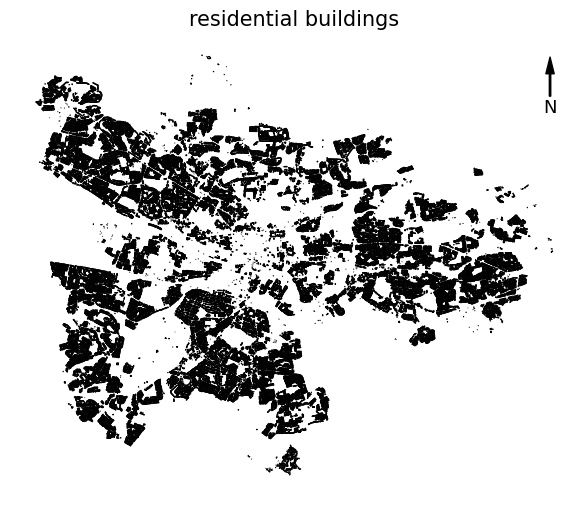

In [308]:
# combined population census data with SIMD data
fig,ax=plt.subplots(figsize=(12,6))
residential_buildings.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)

ax.set_title('residential buildings', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

In [335]:
residential_buildings

,use,geometry
0,RESIDENTIAL ONLY,"MULTIPOLYGON (((-483428.849 7518664.569, -4834..."
1,RESIDENTIAL ONLY,"MULTIPOLYGON (((-467603.083 7537381.600, -4676..."
2,RESIDENTIAL ONLY,"MULTIPOLYGON (((-473318.817 7520619.648, -4733..."
3,RESIDENTIAL ONLY,"MULTIPOLYGON (((-473197.925 7521322.424, -4732..."
4,RESIDENTIAL ONLY,"MULTIPOLYGON (((-458821.369 7530132.882, -4588..."
...,...,...
153743,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-457712.806 7528857.442, -4576..."
153765,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-479956.854 7538923.801, -4799..."
153787,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-476242.615 7523611.199, -4762..."
154227,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-457845.444 7528783.039, -4578..."


In [336]:
# generate centroid for residential buildings

residential_buildings['center']=residential_buildings.geometry.centroid

In [337]:
residential_buildings

,use,geometry,center
0,RESIDENTIAL ONLY,"MULTIPOLYGON (((-483428.849 7518664.569, -4834...",POINT (-483428.455 7518675.862)
1,RESIDENTIAL ONLY,"MULTIPOLYGON (((-467603.083 7537381.600, -4676...",POINT (-467605.325 7537390.422)
2,RESIDENTIAL ONLY,"MULTIPOLYGON (((-473318.817 7520619.648, -4733...",POINT (-473320.293 7520610.943)
3,RESIDENTIAL ONLY,"MULTIPOLYGON (((-473197.925 7521322.424, -4732...",POINT (-473206.037 7521320.610)
4,RESIDENTIAL ONLY,"MULTIPOLYGON (((-458821.369 7530132.882, -4588...",POINT (-458831.259 7530130.349)
...,...,...,...
153743,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-457712.806 7528857.442, -4576...",POINT (-457708.252 7528846.537)
153765,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-479956.854 7538923.801, -4799...",POINT (-479969.415 7538916.892)
153787,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-476242.615 7523611.199, -4762...",POINT (-476257.083 7523613.889)
154227,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-457845.444 7528783.039, -4578...",POINT (-457864.829 7528785.496)


In [338]:
residential_buildings_center=residential_buildings[['use','center']]

In [339]:
residential_buildings_center=residential_buildings_center.set_geometry('center')

Text(0.95, 0.84, 'N')

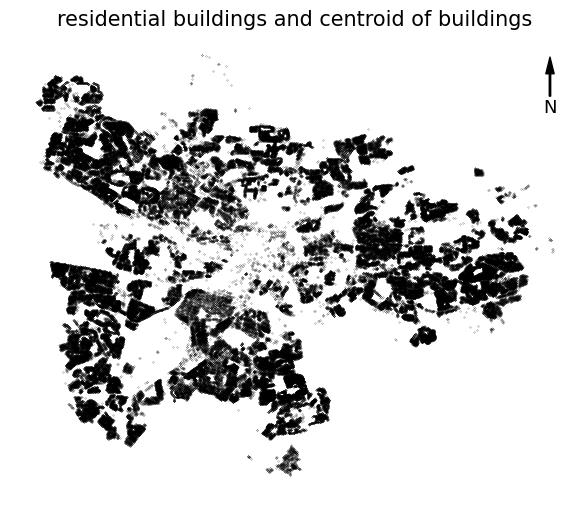

In [340]:
# combined population census data with SIMD data
fig,ax=plt.subplots(figsize=(12,6))
residential_buildings_center.plot(ax=ax,color='black',marker='.',markersize=0.1)

ax.set_title('residential buildings and centroid of buildings', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

In [341]:
residential_buildings_center

,use,center
0,RESIDENTIAL ONLY,POINT (-483428.455 7518675.862)
1,RESIDENTIAL ONLY,POINT (-467605.325 7537390.422)
2,RESIDENTIAL ONLY,POINT (-473320.293 7520610.943)
3,RESIDENTIAL ONLY,POINT (-473206.037 7521320.610)
4,RESIDENTIAL ONLY,POINT (-458831.259 7530130.349)
...,...,...
153743,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,POINT (-457708.252 7528846.537)
153765,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,POINT (-479969.415 7538916.892)
153787,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,POINT (-476257.083 7523613.889)
154227,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,POINT (-457864.829 7528785.496)


In [346]:
# join residential building with output area and simd dataset
gla_simd_oa_resi=gpd.sjoin(residential_buildings_center,gla_simd_oa,how='inner',lsuffix='R', rsuffix='OA',op='within')

/Users/hucongying/mambaforge/envs/geo/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [347]:
gla_simd_oa_resi.shape

(135560, 60)

In [350]:
gla_simd_oa_resi

,use,center,index_OA,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code
1,RESIDENTIAL ONLY,POINT (-467605.325 7537390.422),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.163680,345598.156621,S01010196,1
11375,RESIDENTIAL ONLY,POINT (-467781.986 7537103.662),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.163680,345598.156621,S01010196,1
11580,RESIDENTIAL ONLY,POINT (-467364.676 7537599.318),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.163680,345598.156621,S01010196,1
16578,RESIDENTIAL ONLY,POINT (-467330.604 7537614.008),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.163680,345598.156621,S01010196,1
18100,RESIDENTIAL ONLY,POINT (-467788.821 7537092.552),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.163680,345598.156621,S01010196,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151130,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,POINT (-474337.044 7534119.634),4567,76,11.95,6.4,566,S01010313,Keppochhill - 05,Glasgow City,...,1656.0,155,37,24%,6%,354.0,3004.512831,189812.632999,S01010313,1
151712,RESIDENTIAL WITH RETAIL ON GROUND FLOOR,POINT (-473032.573 7530339.834),7879,55,0.34,161.8,518,S01010265,City Centre East - 07,Glasgow City,...,137.0,391,59,45%,7%,21.0,1727.997581,68584.296366,S01010265,1
152412,RESIDENTIAL WITH RETAIL ON GROUND FLOOR,POINT (-473540.480 7529744.375),584,76,0.09,844.4,527,S01010274,City Centre South - 03,Glasgow City,...,3.0,142,13,26%,2%,400.0,3547.089132,233139.344025,S01010274,1
152769,RESIDENTIAL WITH RETAIL ON GROUND FLOOR,POINT (-481291.382 7536485.171),6736,110,3.25,33.8,724,S01010469,Anniesland East - 05,Glasgow City,...,683.0,188,58,34%,10%,70.0,2338.595605,129082.943765,S01010469,1


In [352]:
# check the relation among datazone, output area and residential buildings
gla_simd_oa_resi[gla_simd_oa_resi['index_OA']==4715]

,use,center,index_OA,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code
492,RESIDENTIAL ONLY,POINT (-481542.313 7518452.111),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
3081,RESIDENTIAL ONLY,POINT (-481583.498 7518517.783),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
4857,RESIDENTIAL ONLY,POINT (-481665.775 7518383.766),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
9272,RESIDENTIAL ONLY,POINT (-481566.510 7518541.698),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
13673,RESIDENTIAL ONLY,POINT (-481512.622 7518554.153),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
16263,RESIDENTIAL ONLY,POINT (-481567.310 7518435.041),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
18719,RESIDENTIAL ONLY,POINT (-481505.291 7518548.849),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
19612,RESIDENTIAL ONLY,POINT (-481559.240 7518444.574),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
19766,RESIDENTIAL ONLY,POINT (-481806.418 7518470.049),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
19928,RESIDENTIAL ONLY,POINT (-481636.667 7518432.754),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1


Text(0.95, 0.84, 'N')

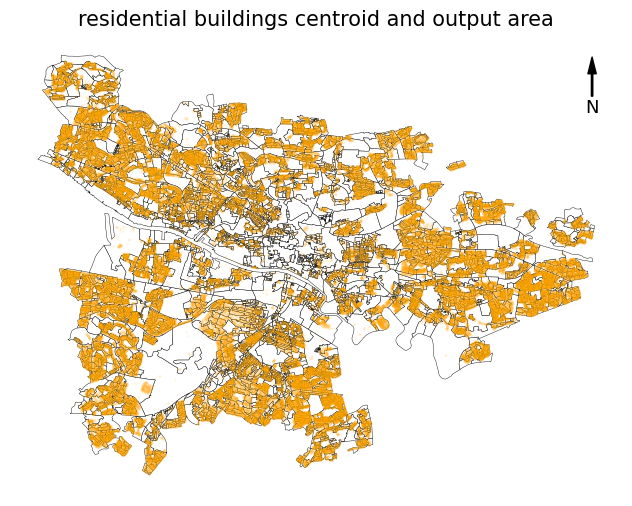

In [360]:
# demonstrate all the data on the map
fig,ax=plt.subplots(figsize=(12,6))
gla_simd_oa.plot(ax=ax,color='white', edgecolor='black',linewidth=0.3)
gla_simd_oa_resi.plot(ax=ax,color='orange',marker='.',markersize=0.1,alpha=0.5)

ax.set_title('residential buildings centroid and output area', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

## 2. Utilizing K-means to generate centroid for each output area

### 2.1 take one output area as example

In [506]:
gdf=gla_simd_oa_resi[gla_simd_oa_resi['index_OA']==4879]

In [507]:
gdf.head()

,use,center,index_OA,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code
1,RESIDENTIAL ONLY,POINT (-467605.325 7537390.422),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1
11375,RESIDENTIAL ONLY,POINT (-467781.986 7537103.662),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1
11580,RESIDENTIAL ONLY,POINT (-467364.676 7537599.318),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1
16578,RESIDENTIAL ONLY,POINT (-467330.604 7537614.008),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1
18100,RESIDENTIAL ONLY,POINT (-467788.821 7537092.552),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1


Text(0.95, 0.84, 'N')

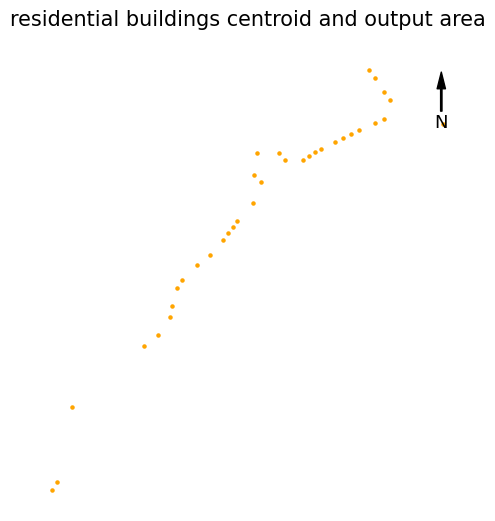

In [508]:
# demonstrate all the data on the map
fig,ax=plt.subplots(figsize=(12,6))
gdf.plot(ax=ax,color='orange',marker='.',markersize=20)

ax.set_title('residential buildings centroid and output area', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

In [509]:
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y


/Users/hucongying/mambaforge/envs/geo/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/hucongying/mambaforge/envs/geo/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [510]:
gdf

,use,center,index_OA,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,...,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code,x,y
1,RESIDENTIAL ONLY,POINT (-467605.325 7537390.422),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467605.325306,7.537390e+06
11375,RESIDENTIAL ONLY,POINT (-467781.986 7537103.662),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467781.985806,7.537104e+06
11580,RESIDENTIAL ONLY,POINT (-467364.676 7537599.318),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467364.675916,7.537599e+06
16578,RESIDENTIAL ONLY,POINT (-467330.604 7537614.008),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467330.604441,7.537614e+06
18100,RESIDENTIAL ONLY,POINT (-467788.821 7537092.552),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467788.820592,7.537093e+06
19471,RESIDENTIAL ONLY,POINT (-467546.536 7537448.552),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467546.536216,7.537449e+06
22216,RESIDENTIAL ONLY,POINT (-467492.065 7537530.813),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467492.064952,7.537531e+06
35511,RESIDENTIAL ONLY,POINT (-467432.203 7537561.973),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467432.202944,7.537562e+06
41511,RESIDENTIAL ONLY,POINT (-467309.043 7537646.898),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467309.043115,7.537647e+06
45410,RESIDENTIAL ONLY,POINT (-467501.683 7537540.510),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467501.682560,7.537541e+06


In [572]:
# test the distance of residential buildings and the potential BDSCAN paramater of 'epsilon'
gdf['buffer'] = gdf.geometry.buffer(100) # 50 meter seems the proper distance 

/Users/hucongying/mambaforge/envs/geo/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.95, 0.84, 'N')

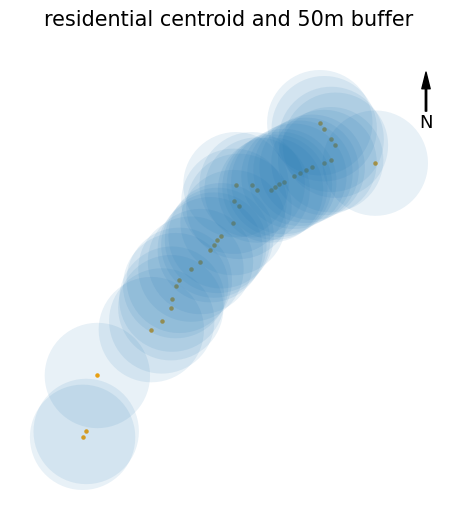

In [573]:
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax, color='orange', marker='.', markersize=20)

# Plot the buffer polygons
gdf['buffer'].plot(ax=ax, alpha=0.1)

ax.set_title('residential centroid and 50m buffer', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

### 2.2 DBSCAN test in single OA

In [513]:
from sklearn.cluster import DBSCAN

In [514]:
long_lat = gdf[['x', 'y']]

X = long_lat.to_numpy()

In [565]:

dbscan_cluster_model = DBSCAN(eps=100, min_samples=1).fit(X)
dbscan_cluster_model

DBSCAN(eps=100, min_samples=1)

In [566]:
gdf['cluster'] = dbscan_cluster_model.labels_

/Users/hucongying/mambaforge/envs/geo/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [567]:
gdf['cluster'].value_counts()

cluster
0    33
1     2
2     1
Name: count, dtype: int64

In [568]:
import plotly.express as px

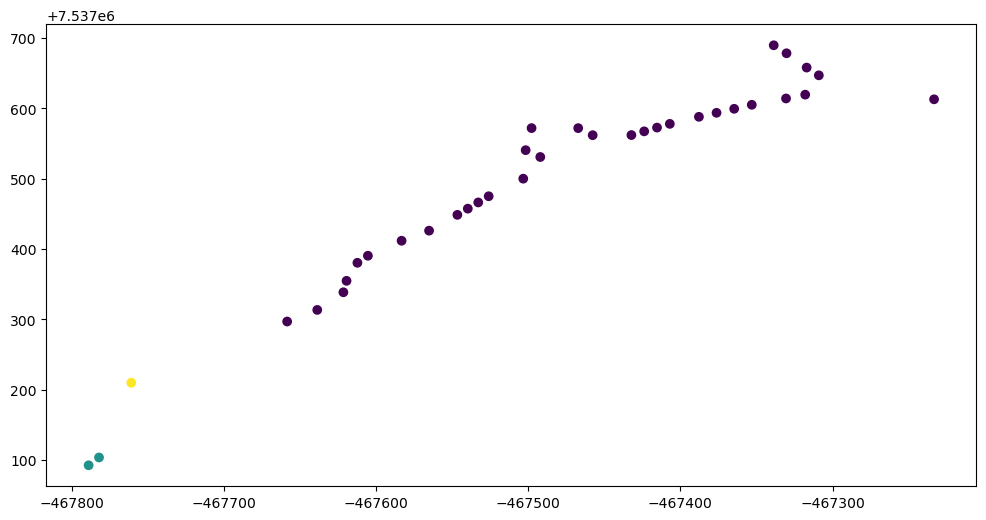

In [569]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x=gdf['x'], y=gdf['y'], c=gdf['cluster'])


In [570]:
from sklearn.metrics import silhouette_score as ss

In [571]:
ss(X, gdf['cluster'])

0.48219567970908084